In [9]:
# Import libaries
import pandas as pd
import numpy as np
import scipy.stats
import seaborn as sns
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import statistics
import operator

The anime.csv dataset contains information about the following columns:

- anime_id: An identifier for the anime
- name: The name of the anime
- genre: The genre(s) of the anime
- type: The type of anime (e.g., TV, Movie)
- episodes: The number of episodes (Note: This is an object type, suggesting some non-numeric values may be present.)
- rating: The rating of the anime
- members: The number of members who have added this anime to their list

## Exploritary Data Analysis

In [10]:
# load the data from 'anime.csv' into a DataFrame named 'animes'.
animes = pd.read_csv('anime.csv')
animes.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [11]:
# Concise summary of the DataFrame
animes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12294 entries, 0 to 12293
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   anime_id  12294 non-null  int64  
 1   name      12294 non-null  object 
 2   genre     12232 non-null  object 
 3   type      12269 non-null  object 
 4   episodes  12294 non-null  object 
 5   rating    12064 non-null  float64
 6   members   12294 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 672.5+ KB


In [12]:
# Calculates the total number of missing (null) values in each column
animes.isnull().sum()

anime_id      0
name          0
genre        62
type         25
episodes      0
rating      230
members       0
dtype: int64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values
animes['genre'].fillna('Unknown', inplace=True)
animes['type'].fillna('Unknown', inplace=True)

# Convert the 'episodes' column to numeric data type using
# the pd.to_numeric() function, with any non-convertible values replaced by 0
animes['episodes'] = pd.to_numeric(animes['episodes'], errors='coerce').fillna(0)

# Fill missing ratings with mean rating
animes['rating'].fillna(animes['rating'].mean(), inplace=True)

In [14]:
# Generate descriptive statistics for the numerical columns
animes.describe()

,anime_id,episodes,rating,members
count,12294.000000,12294.000000,12294.000000,1.229400e+04
mean,14058.221653,12.040101,6.473902,1.807134e+04
std,11455.294701,46.257299,1.017096,5.482068e+04
min,1.000000,0.000000,1.670000,5.000000e+00
25%,3484.250000,1.000000,5.900000,2.250000e+02
50%,10260.500000,2.000000,6.550000,1.550000e+03
75%,24794.500000,12.000000,7.170000,9.437000e+03
max,34527.000000,1818.000000,10.000000,1.013917e+06


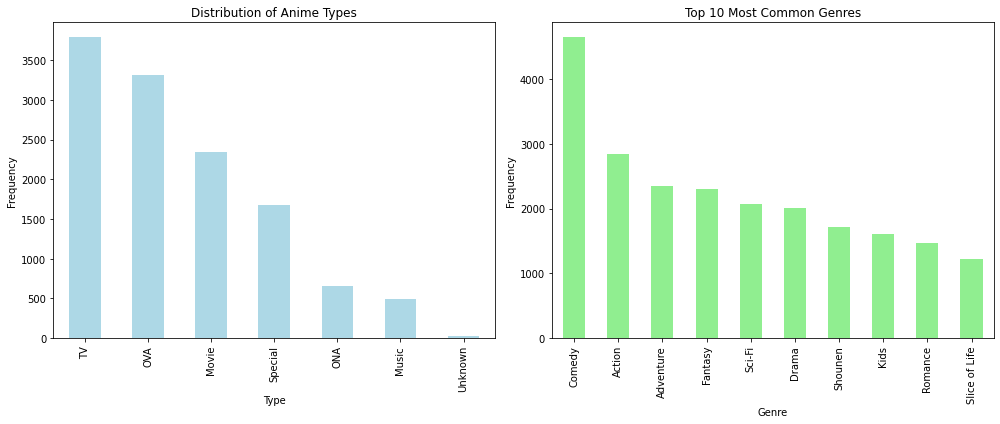

In [15]:
# Analyzing categorical variables
type_counts = animes['type'].value_counts()
genre_counts = animes['genre'].str.split(', ').explode().value_counts().head(10)

# Plotting the distributions
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

type_counts.plot(kind='bar', ax=ax[0], color='lightblue')
ax[0].set_title('Distribution of Anime Types')
ax[0].set_ylabel('Frequency')
ax[0].set_xlabel('Type')

genre_counts.plot(kind='bar', ax=ax[1], color='lightgreen')
ax[1].set_title('Top 10 Most Common Genres')
ax[1].set_ylabel('Frequency')
ax[1].set_xlabel('Genre')

plt.tight_layout()
plt.show()

In [16]:
# Read the rating.csv file and store its contents in the 'ratings' dataframe
ratings = pd.read_csv('rating.csv')

In [17]:
# Exclude rows where the rating is -1 (implying missing or few ratings from individuals)
ratings = ratings[ratings.rating != -1]
ratings.head()

,user_id,anime_id,rating
47,1,8074,10
81,1,11617,10
83,1,11757,10
101,1,15451,10
153,2,11771,10


In [18]:
ratings.isnull().sum()

user_id     0
anime_id    0
rating      0
dtype: int64

In [19]:
# Generate descriptive statistics for the numerical columns
ratings['rating'].describe().astype(str)

count             6337241.0
mean      7.808496946857473
std      1.5724960304974225
min                     1.0
25%                     7.0
50%                     8.0
75%                     9.0
max                    10.0
Name: rating, dtype: object

In [20]:
# Calculate the number of unique user IDs
len(ratings['user_id'].unique())

69600

In [21]:
# Calculate the number of unique anime IDs
len(animes['anime_id'].unique())

12294

In [22]:
import statistics

# Calculate the number of ratings per user
ratings_per_user = ratings.groupby('user_id')['rating'].count()
print(ratings_per_user)
# Calculate the mean number of ratings per user
mean_ratings_per_user = statistics.mean(ratings_per_user.tolist())
mean_ratings_per_user

user_id
1          4
2          1
3         92
5        459
7        343
        ... 
73512     12
73513     33
73514      1
73515    179
73516      2
Name: rating, Length: 69600, dtype: int64


91.05231321839081

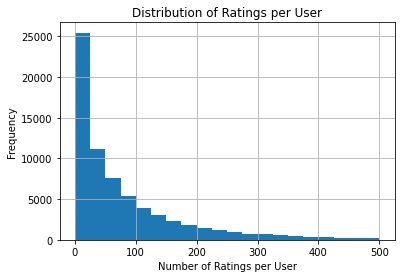

In [23]:
import matplotlib.pyplot as plt

# Plot a histogram of the number of ratings per user
ratings_per_user.hist(bins=20, range=(0,500))
plt.xlabel('Number of Ratings per User')
plt.ylabel('Frequency')
plt.title('Distribution of Ratings per User')
plt.show()

In [24]:
# Calculate the number of ratings per anime
ratings_per_anime = ratings.groupby('anime_id')['rating'].count()

# Calculate the mean number of ratings per anime
mean_ratings_per_anime = statistics.mean(ratings_per_anime.tolist())
mean_ratings_per_anime

638.3843054296364

## Data Preparation

In [25]:
# Create a DataFrame from the ratings per anime data
ratings_per_anime_df = pd.DataFrame(ratings_per_anime)

# Filter the DataFrame to include only anime with 1000 or more ratings. Find popular anime
filtered_ratings_per_anime_df = ratings_per_anime_df[ratings_per_anime_df.rating >= 1000]

# Extract the indices (anime IDs) of popular anime
popular_anime = filtered_ratings_per_anime_df.index.tolist()

In [26]:
# Create a DataFrame from the ratings per user data
ratings_per_user_df = pd.DataFrame(ratings_per_user)

# Filter the DataFrame to include only users with 500 or more ratings. Find Active rating users
filtered_ratings_per_user_df = ratings_per_user_df[ratings_per_user_df.rating >= 500]

# Extract the indices (user IDs) of prolific users
prolific_users = filtered_ratings_per_user_df.index.tolist()

In [27]:
# Filter the ratings dataset to include only ratings for popular anime
filtered_ratings = ratings[ratings.anime_id.isin(popular_anime)]

# Further filter the ratings dataset to include only ratings from prolific users
filtered_ratings = ratings[ratings.user_id.isin(prolific_users)]

# Calculate the length of the filtered ratings dataset
len(filtered_ratings)

1005314

In [28]:
# Create a pivot table to construct the user-item rating matrix
rating_matrix = filtered_ratings.pivot_table(index='user_id', columns='anime_id', values='rating')

# Fill missing values (NaN) with 0
rating_matrix = rating_matrix.fillna(0)

rating_matrix.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
226,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
294,7.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
392,7.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
446,9.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,...,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Recommendation Engine Development - User Based Approach

In [29]:
# Find similar users, exclude itself; convert it to a list
from sklearn.metrics.pairwise import cosine_similarity
import operator

def similar_users(user_id, matrix, k=3):
    sim_score = cosine_similarity(matrix)
    sim_score_df = pd.DataFrame(sim_score,matrix.index,columns=matrix.index)
    users=sim_score_df[user_id].sort_values(ascending=False)[1:].head(k).index
    
    return users.tolist()

In [32]:
# Define the current user's ID
current_user = 271

# Find similar users to the current user
similar_user_indices = similar_users(current_user, rating_matrix)
print(similar_user_indices) 

[1103, 13652, 20314]


In [38]:
# Recommend items based on top 3 similar users' mean rating; Select top 5
def recommend_item(user_index,matrix, items=5):
    similar_user_indices = similar_users(user_index,rating_matrix,k=3)
    recommended_items=matrix[matrix.index.isin(similar_user_indices)].mean().sort_values().tail(items).index.tolist()
    anime_information=animes[animes['anime_id'].isin(recommended_items)]
    return anime_information

In [39]:
# Test for user ID 271
recommend_item(271,rating_matrix)

,anime_id,name,genre,type,episodes,rating,members
10,4181,Clannad: After Story,"Drama, Fantasy, Romance, Slice of Life, Supern...",TV,24.0,9.06,456749
36,11741,Fate/Zero 2nd Season,"Action, Fantasy, Supernatural, Thriller",TV,12.0,8.73,340973
94,10087,Fate/Zero,"Action, Fantasy, Supernatural",TV,13.0,8.51,453630
180,18195,Little Busters!: Refrain,"Comedy, Drama, Romance, School, Slice of Life,...",TV,13.0,8.36,71820
223,2167,Clannad,"Comedy, Drama, Romance, School, Slice of Life,...",TV,23.0,8.30,566690


## Recommendation Engine Development - Item Based Approach

In [41]:
# Define dataset representing ratings given by users to various TV shows
dataset = {
    'user1': {'Mindhunter': 5, 'You': 3, 'Dexter': 3, 'Mr. Robot': 3, 'True Detective': 2, 'Twin Peaks': 3},
    'user2': {'Mindhunter': 5, 'You': 3, 'Mr. Robot': 5, 'Dexter': 5, 'Twin Peaks': 3, 'True Detective': 3},
    'user3': {'Mindhunter': 2, 'Dexter': 5, 'Mr. Robot': 3, 'Twin Peaks': 4},
    'user4': {'Dexter': 5, 'Twin Peaks': 4, 'Mr. Robot': 4},
    'user5': {'Mindhunter': 4, 'You': 4, 'Dexter': 4, 'Twin Peaks': 3, 'True Detective': 2},
    'user6': {'Mindhunter': 3, 'Dexter': 4, 'Twin Peaks': 3, 'Mr. Robot': 5, 'True Detective': 3},
    'user7': {'Dexter': 4, 'True Detective': 1, 'Mr. Robot': 4}
}

In [45]:
# Convert the dataset dictionary to a DataFrame
dataset_df = pd.DataFrame(dataset)

# Fill missing values (NaN) with "Not Seen"
dataset_df.fillna("Not Seen", inplace=True)

dataset_df

,user1,user2,user3,user4,user5,user6,user7
Mindhunter,5,5,2.0,Not Seen,4.0,3.0,Not Seen
You,3,3,Not Seen,Not Seen,4.0,Not Seen,Not Seen
Dexter,3,5,5.0,5.0,4.0,4.0,4.0
Mr. Robot,3,5,3.0,4.0,Not Seen,5.0,4.0
True Detective,2,3,Not Seen,Not Seen,2.0,3.0,1.0
Twin Peaks,3,3,4.0,4.0,3.0,3.0,Not Seen


In [46]:
def unique_items():
   
    return pd.DataFrame(dataset).index.unique().tolist()

In [47]:
df=pd.DataFrame(dataset)

In [48]:
df

,user1,user2,user3,user4,user5,user6,user7
Mindhunter,5,5,2.0,NaN,4.0,3.0,NaN
You,3,3,NaN,NaN,4.0,NaN,NaN
Dexter,3,5,5.0,5.0,4.0,4.0,4.0
Mr. Robot,3,5,3.0,4.0,NaN,5.0,4.0
True Detective,2,3,NaN,NaN,2.0,3.0,1.0
Twin Peaks,3,3,4.0,4.0,3.0,3.0,NaN


In [49]:
def item_similarity(item1, item2):
    sim = cosine_similarity(df.fillna(0))
    sim_df = pd.DataFrame(sim,columns=df.index,index=df.index)
    cs=sim_df[sim_df.index==item1][item2].values
    
    return cs

In [52]:
# Print the cosine similarity between 'Dexter' and 'Mr. Robot' based on ratings
print("Cosine Similarity:", item_similarity('Dexter', 'Mr. Robot'))

Cosine Similarity: [0.91390769]


In [66]:
def most_similar_items(target_item):
    # Obtain a list of all unique items
    un_lst = unique_items()

    # Calculate similarity scores between the target item and all other items
    scores = [(item_similarity(target_item, other_item), target_item + " >>> " + other_item) for other_item in un_lst if other_item != target_item]

    # Sort the similarity scores in descending order
    scores.sort(reverse=True)

    # Return the sorted similarity scores
    return scores

In [67]:
# Print the most similar items to 'Dexter' based on their similarity scores
print(most_similar_items('Dexter'))

[(array([0.92884073]), 'Dexter >>> Twin Peaks'), (array([0.91390769]), 'Dexter >>> Mr. Robot'), (array([0.76382539]), 'Dexter >>> Mindhunter'), (array([0.75377836]), 'Dexter >>> True Detective'), (array([0.59708143]), 'Dexter >>> You')]


In [57]:
def target_shows_to_users(target_person):
    # Get all unique shows from the dataset
    unique_shows = set(df.index)

    # Get shows rated by the target person
    target_person_shows = set(df[target_person].dropna().index)

    # Find shows not yet rated by the target person
    recommended_shows = list(unique_shows - target_person_shows)

    # Return recommendations (or 0 if no recommendations available)
    return recommended_shows, list(target_person_shows)

In [64]:
# Obtain lists of unseen and seen tv shows for user 'user7' using the target_shows_to_users function
unseen_shows, seen_shows = target_shows_to_users('user7')

# Create a dictionary to store unseen and seen movies
dct = {"Seen Shows": seen_shows, "Unseen Shows": unseen_shows}

# Convert the dictionary to a DataFrame for better visualization
pd.DataFrame(dct)

,Seen Shows,Unseen Shows
0,Dexter,Mindhunter
1,True Detective,You
2,Mr. Robot,Twin Peaks
